conda env: flaml

# FLAML

In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

train = pd.read_csv('../data/train.csv', sep=",")
test = pd.read_csv('../data/test.csv')

import sklearn
y = train['SalePrice']
X = train.drop('SalePrice', axis=1)
y = np.log1p(y)
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, random_state=42, test_size=0.2)

from flaml import AutoML
from flaml.default import LGBMRegressor
automl = AutoML()
# X_train, X_test, y_train, y_test
automl.fit(X_train, y_train, task="regression", estimator_list=["lgbm", "rf", "extra_tree"],
           train_time_limit=60,
           time_budget=100,
           n_jobs=-1,
          ## ensemble=dict(final_estimator= LGBMRegressor(),
          ## passthrough = True), 
           log_file_name='flaml_.log', log_type='all')

print(automl.best_estimator)

print(automl.best_config)

print(automl.best_config_per_estimator)

[flaml.automl.logger: 04-06 14:15:25] {1768} INFO - task = regression
[flaml.automl.logger: 04-06 14:15:25] {1775} INFO - Data split method: uniform
[flaml.automl.logger: 04-06 14:15:25] {1778} INFO - Evaluation method: cv
[flaml.automl.logger: 04-06 14:15:25] {1891} INFO - Minimizing error metric: 1-r2
[flaml.automl.logger: 04-06 14:15:25] {2011} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'extra_tree']
[flaml.automl.logger: 04-06 14:15:25] {2341} INFO - iteration 0, current learner lgbm
[flaml.automl.logger: 04-06 14:15:26] {2479} INFO - Estimated sufficient time budget=8814s. Estimated necessary time budget=9s.
[flaml.automl.logger: 04-06 14:15:26] {2526} INFO -  at 1.0s,	estimator lgbm's best error=0.6546,	best estimator lgbm's best error=0.6546
[flaml.automl.logger: 04-06 14:15:26] {2341} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 04-06 14:15:27] {2526} INFO -  at 1.6s,	estimator lgbm's best error=0.6546,	best estimator lgbm's best error=0.6546
[fl

[flaml.automl.logger: 04-06 14:15:39] {2341} INFO - iteration 33, current learner lgbm
[flaml.automl.logger: 04-06 14:15:46] {2526} INFO -  at 20.8s,	estimator lgbm's best error=0.1117,	best estimator lgbm's best error=0.1117
[flaml.automl.logger: 04-06 14:15:46] {2341} INFO - iteration 34, current learner rf
[flaml.automl.logger: 04-06 14:15:46] {2526} INFO -  at 21.2s,	estimator rf's best error=0.1480,	best estimator lgbm's best error=0.1117
[flaml.automl.logger: 04-06 14:15:46] {2341} INFO - iteration 35, current learner extra_tree
[flaml.automl.logger: 04-06 14:15:47] {2526} INFO -  at 22.1s,	estimator extra_tree's best error=0.1335,	best estimator lgbm's best error=0.1117
[flaml.automl.logger: 04-06 14:15:47] {2341} INFO - iteration 36, current learner rf
[flaml.automl.logger: 04-06 14:15:48] {2526} INFO -  at 22.9s,	estimator rf's best error=0.1480,	best estimator lgbm's best error=0.1117
[flaml.automl.logger: 04-06 14:15:48] {2341} INFO - iteration 37, current learner extra_tree

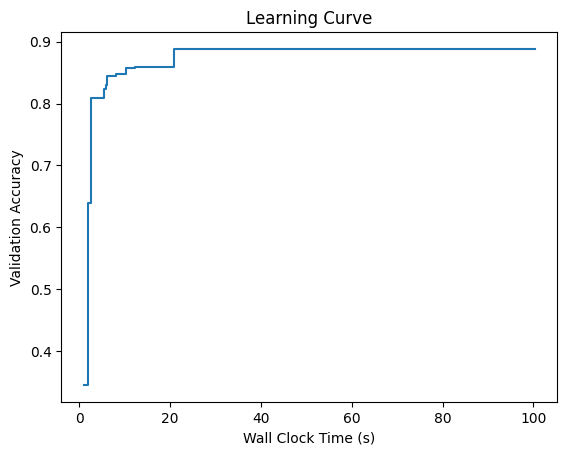

0.13636149524087587

In [2]:
from flaml.data import get_output_from_log

time_history, best_valid_loss_history, valid_loss_history, config_history, metric_history = \
    get_output_from_log(filename='flaml_.log', time_budget=120)


!pip install matplotlib

import matplotlib.pyplot as plt
import numpy as np

plt.title("Learning Curve")
plt.xlabel("Wall Clock Time (s)")
plt.ylabel("Validation Accuracy")
plt.step(time_history, 1 - np.array(best_valid_loss_history), where="post")
plt.show()

prediction = automl.predict(X_test)

np.sqrt(np.mean((prediction - y_test)**2))

In [3]:
print(automl.best_estimator)

lgbm
